## Problem - 1

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Bangalore 412
Mumbai 303
New Delhi 215
Gurgaon 166
Noida 46


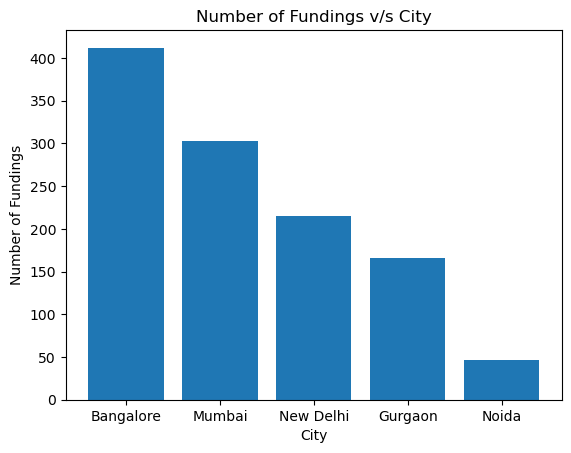

In [2]:
df_start = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df_start.dropna(subset = ['CityLocation', 'AmountInUSD'], inplace = True)  # remove null value sfrom multiple columns

def seperateCity(city):
    return city.split('/')[0].strip()

df_start['CityLocation'] = df_start['CityLocation'].apply(seperateCity)
df_start['CityLocation'] = df_start['CityLocation'].replace(['Delhi', 'bangalore'], ['New Delhi', 'Bangalore'])
df_start = df_start[(df_start['CityLocation'] == 'Bangalore') | (df_start['CityLocation'] == 'Mumbai') | (df_start['CityLocation'] == 'Gurgaon') | (df_start['CityLocation'] == 'Noida') | (df_start['CityLocation'] == 'New Delhi')]
df_start = df_start.groupby('CityLocation').size()   # returns number of rows in each group
df_start.sort_values(ascending = False, inplace = True)

city = df_start.index
funding = df_start.values

for i in range(len(city)):
    print(city[i], funding[i])
    
plt.bar(city, funding)
plt.title('Number of Fundings v/s City')
plt.xlabel('City')
plt.ylabel('Number of Fundings')
plt.show()

## Problem - 2

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

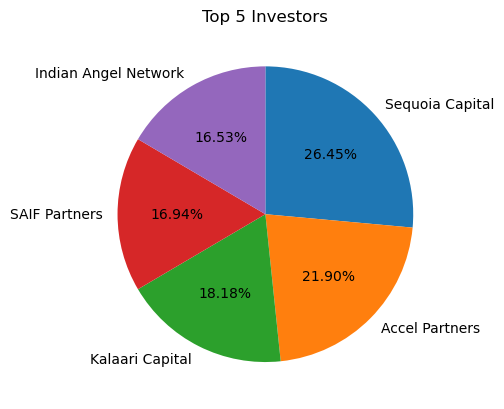

In [4]:
df_start = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df_start = df_start.dropna(subset = ['InvestorsName'])

df_start = df_start[(df_start['InvestorsName'] != 'Undisclosed Investors') | (df_start['InvestorsName'] != 'Undisclosed investors') | (df_start['InvestorsName'] != 'undisclosed investors') | (df_start['InvestorsName'] != 'undisclosed investor')]

def createDictionary(array):
    dictionary = {}
    for i in array:
        if ',' not in i:
            if i in dictionary:
                dictionary[i] = dictionary.get(i) + 1   # The get() method returns the value of the item with the specified key
            else:
                dictionary[i] = 1
        else:
            string = i.strip().split(',')
            for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()] = dictionary.get(j.strip()) + 1
                else:
                    dictionary[j.strip()] = 1
    return dictionary

dictionary = createDictionary(df_start['InvestorsName'])  # stores investor names as keys and number of investments as values
df = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))  # The keys() and values() method in Python Dictionary, returns a view object
df = df.sort_values(by = [0], ascending = False)[0 : 5]  # investor names are index, number of investments are values

investors= df[0].index
count = df[0].values

plt.pie(count, labels = investors, autopct = '%0.2f%%', counterclock = False, startangle = 90)
plt.title('Top 5 Investors')
plt.show()

## Problem - 3

After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Investor Name
Sequoia Capital         49
Accel Partners          47
Kalaari Capital         41
Indian Angel Network    40
Blume Ventures          36
Name: Startup Name, dtype: int64


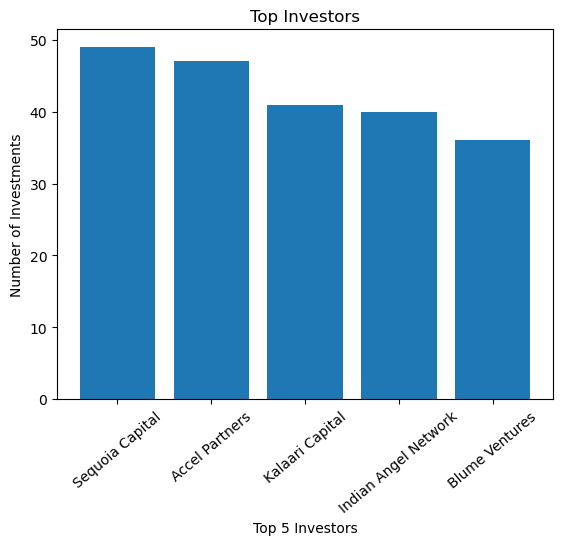

In [24]:
df_start = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df_start.dropna(subset = ['StartupName', 'InvestorsName'])
df_start['StartupName'] = df_start['StartupName'].replace(['Flipkart.com', 'Ola Cabs', 'Olacabs', 'Oyo Rooms', 'Oyorooms', 'OyoRooms', 'Paytm Marketplace'], ['Flipkart', 'Ola', 'Ola', 'Oyo', 'Oyo', 'Oyo', 'Paytm'])
df_start = df_start[(df_start['InvestorsName'] != 'Undisclosed Investors') | (df_start['InvestorsName'] != 'Undisclosed investors')]

investor = []
startup = []
                    
for index, rows in df_start.iterrows():  # Iterate over DataFrame rows as (index, Series) pairs
    invest = rows['InvestorsName']
    strtup = rows['StartupName']             
    string = str(invest).split(',')
    for j in string:
        if j != '':
            investor.append(j.strip())
            startup.append(strtup)
                    
df = pd.DataFrame({'Investor Name' : investor, 'Startup Name' : startup})
df = df.groupby('Investor Name')['Startup Name'].nunique()    # Return Series with number of distinct elements. Can ignore NaN values
df = df.sort_values(ascending  = False)[0 : 5]
print(df)

plt.bar(df.index, df.values)
plt.xticks(rotation = 40)
plt.xlabel('Top 5 Investors')
plt.ylabel('Number of Investments')
plt.title('Top Investors')
plt.show()

## Problem - 4

Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [18]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Investor Name
Indian Angel Network     33
Undisclosed Investors    27
Undisclosed investors    24
Rajan Anandan            23
LetsVenture              16
Name: Startup Name, dtype: int64


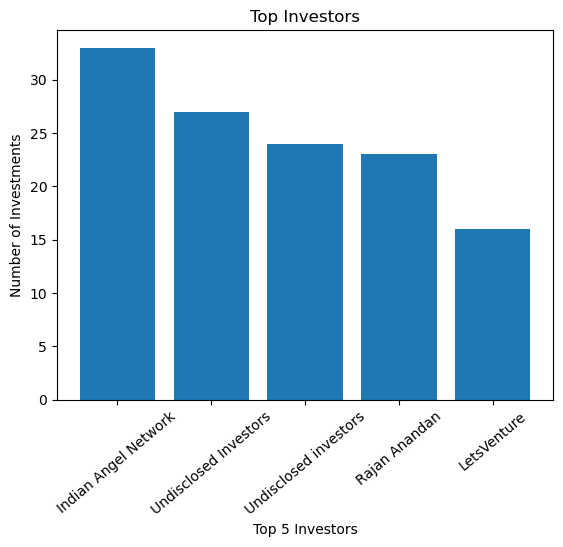

In [25]:
df_start = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df_start.dropna(subset = ['StartupName', 'InvestorsName'])
df_start['StartupName'] = df_start['StartupName'].replace(['Flipkart.com', 'Ola Cabs', 'Olacabs', 'Oyo Rooms', 'Oyorooms', 'OyoRooms', 'Paytm Marketplace'], ['Flipkart', 'Ola', 'Ola', 'Oyo', 'Oyo', 'Oyo', 'Paytm'])
df_start = df_start[(df_start['InvestorsName'] != 'Undisclosed Investors') | (df_start['InvestorsName'] != 'Undisclosed investors')]

df_start['InvestmentType'].replace(['PrivateEquity', 'SeedFunding', 'Crowd funding'], ['Private Equity', 'Seed Funding', 'Crowd Funding'], inplace = True)
df_start = df_start[(df_start['InvestmentType'] == 'Crowd Funding') | (df_start['InvestmentType'] == 'Seed Funding')]

investor = []
startup = []
                    
for index, rows in df_start.iterrows():  # Iterate over DataFrame rows as (index, Series) pairs
    invest = rows['InvestorsName']
    strtup = rows['StartupName']             
    string = str(invest).split(',')
    for j in string:
        if j != '':
            investor.append(j.strip())
            startup.append(strtup)
                    
df = pd.DataFrame({'Investor Name' : investor, 'Startup Name' : startup})
df = df.groupby('Investor Name')['Startup Name'].nunique()    # Return Series with number of distinct elements. Can ignore NaN values
df = df.sort_values(ascending  = False)[0 : 5]
print(df)

plt.bar(df.index, df.values)
plt.xticks(rotation = 40)
plt.xlabel('Top 5 Investors')
plt.ylabel('Number of Investments')
plt.title('Top Investors')
plt.show()

## Problem - 5

Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [26]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Investor Name
Sequoia Capital    46
Accel Partners     43
Kalaari Capital    35
Blume Ventures     27
SAIF Partners      24
Name: Startup Name, dtype: int64


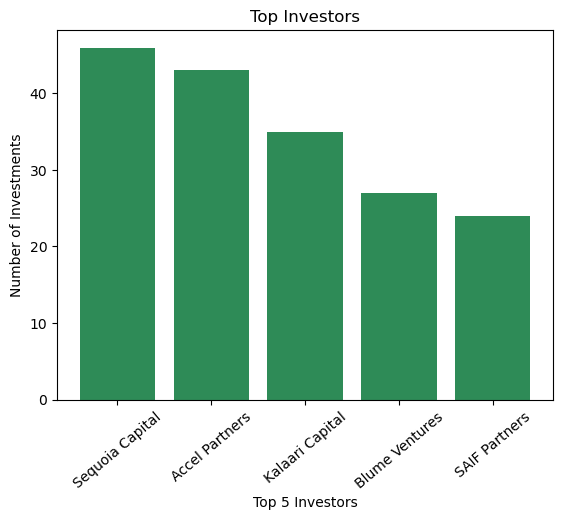

In [27]:
df_start = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df_start.dropna(subset = ['StartupName', 'InvestorsName'])
df_start['StartupName'] = df_start['StartupName'].replace(['Flipkart.com', 'Ola Cabs', 'Olacabs', 'Oyo Rooms', 'Oyorooms', 'OyoRooms', 'Paytm Marketplace'], ['Flipkart', 'Ola', 'Ola', 'Oyo', 'Oyo', 'Oyo', 'Paytm'])
df_start = df_start[(df_start['InvestorsName'] != 'Undisclosed Investors') | (df_start['InvestorsName'] != 'Undisclosed investors')]

df_start['InvestmentType'].replace(['PrivateEquity', 'SeedFunding', 'Crowd funding'], ['Private Equity', 'Seed Funding', 'Crowd Funding'], inplace = True)
df_start = df_start[(df_start['InvestmentType'] == 'Private Equity')]

investor = []
startup = []
                    
for index, rows in df_start.iterrows():  # Iterate over DataFrame rows as (index, Series) pairs
    invest = rows['InvestorsName']
    strtup = rows['StartupName']             
    string = str(invest).split(',')
    for j in string:
        if j != '':
            investor.append(j.strip())
            startup.append(strtup)
                    
df = pd.DataFrame({'Investor Name' : investor, 'Startup Name' : startup})
df = df.groupby('Investor Name')['Startup Name'].nunique()    # Return Series with number of distinct elements. Can ignore NaN values
df = df.sort_values(ascending  = False)[0 : 5]
print(df)

plt.bar(df.index, df.values, color = '#2E8B57')
plt.xticks(rotation = 40)
plt.xlabel('Top 5 Investors')
plt.ylabel('Number of Investments')
plt.title('Top Investors')
plt.show()